<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/Supervised_Learning_Keras_BostonHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning
# Keras Dataset: Boston Housing

## Introduction

The Boston Housing database consists of 506 housing prices. Each house has 13 characteristics which is to be used to predict the house price.

## Dataset
+ The 13 characteristics have different ranges of values, the values are initially scaled to improve model fit.
+ Different combination of dense layers are attempted to identify a combination that does not underfit or overfit the data.

## Methodology
In this supervised learning project, Keras with Tensorflow backend was used.
+ To speed up learning, sklearn's standard scalar was used to normalize the input data
+ To eliminate possibility of underfit model, architectures with increasing number of layers were constructed.
+ To eliminate possibility of overfit model, accuracy on test cases was evaluated

### Architectures
| Model # | Optimizer | Loss | # hidden layers | Layer 1 | Layer 2 | Layer 3 | Layer 4 | Layer 5 | Layer 6 | Change | Error - Train | Error - Test | Time/step |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| 1 | RMSProp | MSE | 2 | 4 | 8 | - | - | - | - | Base | 3484.1 | 4442.98 | 119us |
| 2 | RMSProp | MSE | 2 | 8 | 16 | - | - | - | - | Nodes | 3149.71 | 3273.68 | 66us | 
| 3 | RMSProp | MSE | 3 | 8 | 8 | 16 | - | - | - | Layers | 2553.86 | 3091.69 | 76us | 
| 4 | RMSProp | MSE | 5 | 8 | 8 | 8 | 16 | 16 | - | Layers, Nodes | 2140.06 | 3211.79 | 74us
| 5 | RMSProp | MSE | 5 | 32 | 32 | 32 | 64 | 64 | - | Nodes | 1590.05 | 2842.35 | 85us | 
| 6 | RMSProp | MAE | 3 | 8 | 8 | 16 | - | - | - | Loss | 2596.8 | 3230.72 | 82us | 
| 7 | Adam | MSE | 3 | 8 | 8 | 16 | - | - | - | Optimizer | 2455.65 | 2909.93 | 89us | 

### Optimization
+ Increasing the number of layers from 2 to 3 decreased the test and training error. However, further increase in the number of layers decreased the training error but increased the testing error. This indicates that the model has started to overfit the training data. 
+ Change of loss function from MSE to MAE increased the error, so, the recommended loss function is MSE
+ Change of optimizer from RMSProp to Adam increased the time per step but increased the accuracy by 5.87%, so, it is the recommended optimizer.


## Conclusion
+ The optimal combination of dense layers consisted of 3 layers of 8, 8, 8, 8, 16, and 16 nodes each. This resulted in an accuracy error in test data dropping from 23566.73 dollars to 2914.54 dollars.
+ Changing the loss metric from MSE to MAE increased the loss, so, using MSE would be the recommended method.

In [0]:
! pip install Keras
! pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /opt/anaconda3/lib/python3.7/site-packages (2.0.0)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

from keras.datasets import boston_housing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
(X_train, y_train), (X_test, y_test) =  boston_housing.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


### Scaling the input data
Only Training data is scaled, not Test data

In [0]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# a sample output
print(X_train_scaled[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


### Model # 1

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, verbose = 0, validation_split=0.2, epochs=100) 
print(history.history.keys())

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


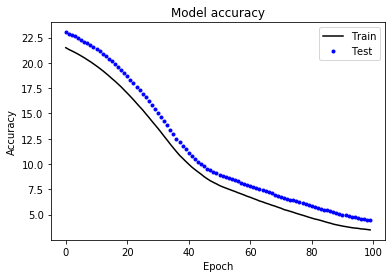

Train - Error in predicting housing prices went down from $21493.37 to $3484.1
Test  - Error in predicting housing prices went down from $23020.2 to $4442.98 



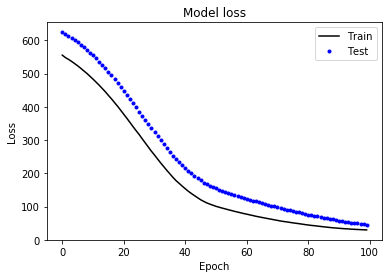

102/102 [==============================] - 0s 119us/step


[40.943850498573454, 4.814094543457031]

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test_scaled, y_test)

**Observation**

As the error is still decreasing for both train and test cases, the model is underfitting the data. As more data can not be added, adding more layer could help.

### Model # 2

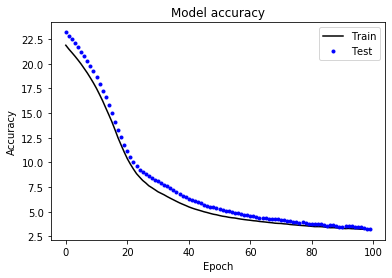

Train - Error in predicting housing prices went down from $21873.46 to $3149.71
Test  - Error in predicting housing prices went down from $23190.73 to $3273.68 



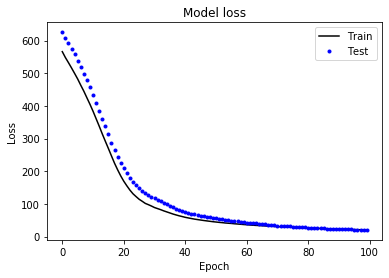

102/102 [==============================] - 0s 66us/step


[22.022674784940833, 3.593090534210205]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, verbose = 0, validation_split=0.2, epochs=100) 
# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")


# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test_scaled, y_test) 

**Observation**

As the error is still decreasing a little bit for both train and test cases, the model is slightly underfitting the data. As more data can not be added, adding more layer could help.

### Model # 3

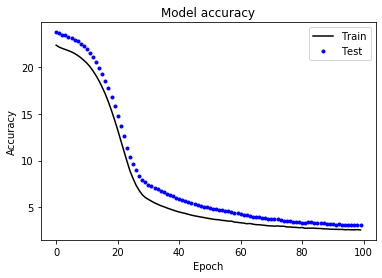

Train - Error in predicting housing prices went down from $22386.31 to $2553.86
Test  - Error in predicting housing prices went down from $23775.01 to $3091.69 



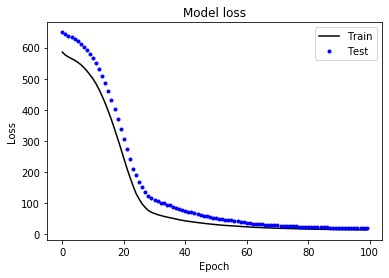

102/102 [==============================] - 0s 76us/step


[21.446130191578586, 3.2291975021362305]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, verbose = 0, validation_split=0.2, epochs=100)

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test_scaled, y_test) 

**Observation**

As the accuracy or loss is still decreasing a little bit for both train and test cases, perhaps adding a layer might be able to reduce error even more.

### Model # 4

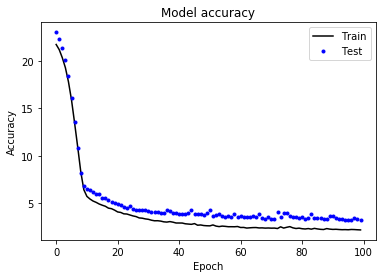

Train - Error in predicting housing prices went down from $21777.08 to $2140.06
Test  - Error in predicting housing prices went down from $23072.71 to $3211.79 



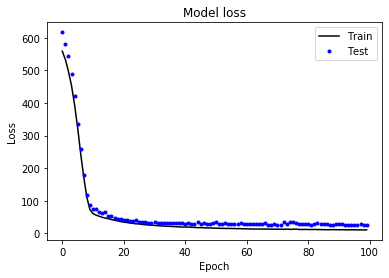

102/102 [==============================] - 0s 74us/step


[34.194052303538605, 3.5058748722076416]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
#model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


history = model.fit(X_train_scaled, y_train, verbose = 0, validation_split=0.2, epochs=100)

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test_scaled, y_test) 

**Observation**

The accuracy or loss become slightly bumpier as the number of epochs increase. However, the model loss for both train and test data is nearly identical. This suggests that that model is fitting the data just right. One more test will be carried out to confirm overfitting.

### Model # 5

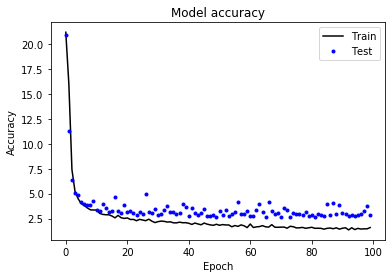

Train - Error in predicting housing prices went down from $21186.78 to $1590.05
Test  - Error in predicting housing prices went down from $20861.27 to $2842.35 



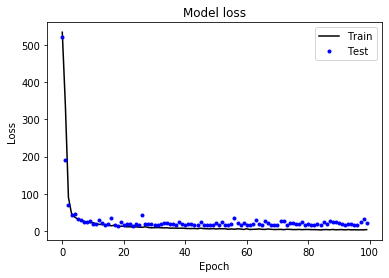

102/102 [==============================] - 0s 85us/step


[22.016294441971123, 3.0137085914611816]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, verbose = 0, validation_split=0.2, epochs=100)

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test_scaled, y_test) 

**Observation**

As the accuracy or loss is clearly increasing with a much bumpier accuracy as epochs increase, this means that the model is overfitting the data.

### Model # 6: Evaluating change in loss metric

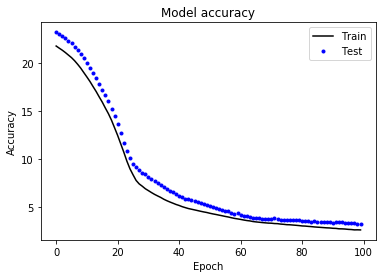

Train - Error in predicting housing prices went down from $21817.09 to $2596.8
Test  - Error in predicting housing prices went down from $23257.34 to $3230.72 



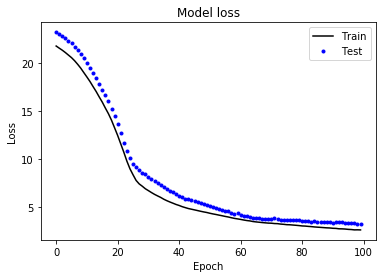

102/102 [==============================] - 0s 82us/step


[3.7215610485450896, 3.7215609550476074]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, verbose = 0, validation_split=0.2, epochs=100)

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test_scaled, y_test)

**Observation**

Using the best fit model, if the accuracy metric was changed from MSE to MAE, the accuracy decreased a little bit. So, using MSE would be recommended as the loss metric.

### Model # 7:  Evaluating change in optimizer

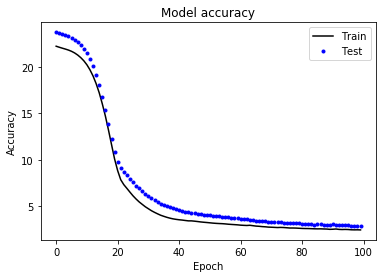

Train - Error in predicting housing prices went down from $22238.17 to $2455.65
Test  - Error in predicting housing prices went down from $23743.24 to $2909.93 



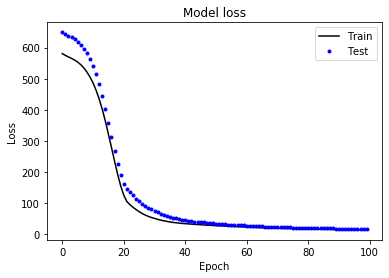

102/102 [==============================] - 0s 89us/step


[19.15690859626321, 3.3737053871154785]

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, verbose = 0, validation_split=0.2, epochs=100)

# Plot training & validation accuracy values
plt.plot(history.history['mae'], 'k-')
plt.plot(history.history['val_mae'], 'b.')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

v1 = round(history.history['mae'][0]*1000,2)
v2 = round(history.history['mae'][-1]*1000,2)
v3 = round(history.history['val_mae'][0]*1000,2)
v4 = round(history.history['val_mae'][-1]*1000,2)
print("Train - Error in predicting housing prices went down from ${} to ${}".format(v1, v2))
print("Test  - Error in predicting housing prices went down from ${} to ${}".format(v3, v4), "\n")

# Plot training & validation loss values
plt.plot(history.history['loss'], 'k-')
plt.plot(history.history['val_loss'], 'b.')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])#, loc='upper left')
plt.show()

# Model evaluation
model.evaluate(X_test_scaled, y_test) 

**Observation**

Models 3 and 7 share the architecture. So, changing the optimizer from RMSProp to Adam increased the time from 76 us/step to 89 us/step, the test error dropped from 3091.69 to 2909.93 which is an improvement of 5.87%. 

### Model # 7:  Evaluating change in optimizer